<a href="https://colab.research.google.com/github/avp123/EnsembleNFL/blob/main/Pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/Ashray Pamula/data")
!ls

catboost_info		       master-boxscore-tracker.xlsx
compiled-boxscores.xlsx        removed-na-rows-master-boxscore-tracker1.xlsx
master-boxscore-tracker1.xlsx  streamlitDataNFLModel.xlsx


In [ ]:
path = "/content/drive/MyDrive/Ashray Pamula/data/master-boxscore-tracker.xlsx"
#path = "/content/drive/MyDrive/Ashray Pamula/data/master-boxscore-tracker1.xlsx"
#path = "/content/drive/MyDrive/Ashray Pamula/data/removed-na-rows-master-boxscore-tracker1.xlsx"
df = pd.read_excel(path)
df.head()
df.shape
df.isna().sum()

df2 = df.loc[:, "Line":]
#df2 = df.loc[:, "Home QBR":]
#df2 = df2.drop(["Home Home Win Streak", "Home Home Win PCT", "Away Road Win PCT"], axis = 1)
df2

,Line,Home Favored,Home QBR,Away QBR,Home PPG,Away PPG,Home PTS Allowed,Away PTS Allowed,Home TO,Away TO,...,Away Road Win PCT,Home Win Streak,Away Win Streak,Home QBR Advantage,Home PPG Advantage,Home PTS Allowed Advantage,Home TO Advantage,Home Win PCT Advantage,Dif PPG,Dif PTS Allowed
0,2.0,1,0.000000,0.000000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0,0,1,1,1,0,1,0.0000,0.000000
1,2.0,0,0.000000,0.000000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0,0,1,1,1,0,1,0.0000,0.000000
2,3.0,0,0.000000,0.000000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0,0,1,1,1,0,1,0.0000,0.000000
3,4.5,1,0.000000,0.000000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0,0,1,1,1,0,1,0.0000,0.000000
4,2.5,1,0.000000,0.000000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0,0,1,1,1,0,1,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4480,0.0,0,107.262404,107.567617,25.6000,30.2000,24.8000,19.266667,1.333333,1.533333,...,0.857143,0,1,0,0,1,1,0,-4.6000,-5.533333
4481,2.5,1,100.544632,88.934373,23.6250,19.6250,24.0625,16.187500,1.375000,1.187500,...,0.750000,0,0,1,1,1,0,1,4.0000,-7.875000
4482,4.0,1,95.188172,113.854167,26.2500,25.1250,14.0625,20.687500,0.937500,1.062500,...,0.625000,0,1,0,1,0,1,1,1.1250,6.625000
4483,8.0,1,107.703672,110.159156,28.6250,25.4375,21.3125,18.937500,0.500000,1.250000,...,0.500000,3,0,0,1,1,1,1,3.1875,-2.375000


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = "mle")
principal_components = pca.fit_transform(df2)
print(pca.explained_variance_ratio_)

[8.08689034e-01 7.14846641e-02 5.47244011e-02 5.43393240e-02
 3.77304312e-03 3.52747890e-03 9.10355611e-04 8.45383112e-04
 4.28677509e-04 3.34769326e-04 2.67836292e-04 2.45359464e-04
 1.15528619e-04 7.09919904e-05 5.89236377e-05 5.28308495e-05
 4.88419951e-05 3.22690191e-05 9.80748944e-06 8.64908056e-06
 6.10883552e-06 5.15523006e-06 4.82910629e-06 2.98771860e-06
 2.86423636e-06 2.51507886e-06 1.91892575e-06 1.83891403e-06
 1.68033613e-06 1.22101856e-06 4.12464104e-07 2.98532468e-07]


In [ ]:
principal_df = pd.DataFrame(data = principal_components)
principal_df.shape

(4485, 32)

In [ ]:
df["Home Win"] = df["Home Win"].astype(int)
y = np.array(df["Home Win"])
X = np.array(df2)

In [ ]:
#Feature Selection

#Removing Features with low variance
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = sel.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=10) # YOUR CODE HERE

In [ ]:
X_train = X[df["Season"] != 2019]
X_test = X[df["Season"] == 2019]
y_train = y[df["Season"] != 2019]
y_test = y[df["Season"] == 2019]

In [ ]:
# STEP 1: Initialization
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(C = 41, random_state = 0)

# STEP 2: Training
logistic_model.fit(X_train, y_train)

# STEP 3: Prediction
#predictions = logistic_model.predict_proba(X_test)
predictions = logistic_model.predict(X_test)
# STEP 4: Evaluation
from sklearn.metrics import accuracy_score
#print(predictions)
accuracy_score(y_test, predictions)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6067415730337079

In [ ]:
from sklearn.ensemble import RandomForestClassifier #n_estimators = 80
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier #66.55%: n_estimators = 12, learning_rate = 0.05, max_depth = 1, random_state = 0
from sklearn.ensemble import AdaBoostClassifier #66.55%: n_estimators = 3
from sklearn.decomposition import PCA

#pca = PCA(n_components = 31)
#X_train = pca.fit(X_train)
#X_test = pca.fit_transform(X_test)
#print(pd.DataFrame(X_train).head())

# STEP 1: Initialization
nfl_model = CatBoostClassifier(learning_rate = 0.03, iterations = 500, depth = 2)


# STEP 2: Training
nfl_model.fit(X_train, y_train)

# STEP 3: Prediction
predictions = nfl_model.predict(X_test)
#predictions = nfl_model.predict_proba(X_test)

# STEP 4: Evaluation
accuracy_score(y_test, predictions)

NameError: ignored

In [ ]:
!pip install optuna
import optuna
from optuna.integration import CatBoostPruningCallback

def objective(trial: optuna.Trial) -> float:
    train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.2)

    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "3gb",
        "eval_metric": "Accuracy",
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1, log=True)

    gbm = cb.CatBoostClassifier(**param)

    pruning_callback = CatBoostPruningCallback(trial, "Accuracy")
    gbm.fit(
        train_x,
        train_y,
        eval_set=[(valid_x, valid_y)],
        verbose=0,
        early_stopping_rounds=100,
        callbacks=[pruning_callback],
    )

    # evoke pruning manually.
    pruning_callback.check_pruned()

    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(valid_y, pred_labels)

    return accuracy

study = optuna.create_study(pruner=optuna.pruners.MedianPruner(n_warmup_steps=5), direction="maximize")
study.optimize(objective, n_trials=100, timeout=600)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [ ]:
best_accuracy = 0
best_param = 0
new_acc = 0

mae_values = []

for k in float_for_loop(90, 300, 1):
  random_forest_model = LGBMClassifier(max_depth = 1, learning_rate = .166, n_estimators = 90)
  random_forest_model.fit(X_train, y_train)
  predictions = random_forest_model.predict(X_test)
  mae_values.append(accuracy_score(y_test, predictions))
  new_acc = accuracy_score(y_test, predictions)
  if(new_acc > best_accuracy):
    best_accuracy = new_acc
    best_param = k

#67.7362 at 90

plt.figure(figsize=(10,6))
plt.plot(range(90, 300), mae_values)

print("Accuracy:", best_accuracy)
print("Best k-value:", best_param)

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(mae_values)

print("Accuracy:", best_accuracy)
print("Best k-value:", best_param)

In [ ]:
%pip install catboost
%pip install lightgbm
%pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 3.8 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier #n_estimators = 80
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier #66.55%: n_estimators = 12, learning_rate = 0.05, max_depth = 1, random_state = 0
from sklearn.ensemble import AdaBoostClassifier #66.55%: n_estimators = 3
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier

from itertools import product
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
new_model_accuracy = []

In [ ]:
year = 2019

#X_train = X[df["Season"] != year]
X_test = X[df["Season"] == year]
#y_train = y[df["Season"] != year]
y_test = y[df["Season"] == year]

In [ ]:
# Voting Classifier

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth = 1, min_samples_split = 12, random_state = 0)
# = 2019
#clf1 = DecisionTreeClassifier(max_depth = 5, min_samples_split = 12, random_state = 0)

clf2 = AdaBoostClassifier(n_estimators = 8, learning_rate = .26, random_state = 0)
#clf2 = AdaBoostClassifier(n_estimators = 9, learning_rate = .30, random_state = 0)

clf3 = GradientBoostingClassifier(n_estimators = 46, learning_rate = .03, max_depth = 5, min_samples_split = 34, random_state = 0)
#clf3 = GradientBoostingClassifier(n_estimators = 33, learning_rate = .04, max_depth = 10, min_samples_split = 14, random_state = 0)

clf4 = LogisticRegression(C = .14, random_state = 0)
#clf4 = LogisticRegression(C = 41, random_state = 0)

clf5 = RandomForestClassifier(n_estimators = 417, max_depth = 3, min_samples_split = 2, random_state=0)
#clf5 = RandomForestClassifier(n_estimators = 127, max_depth = 17, random_state=0, min_samples_split = 2)

clf6 = SVC(C = 173, kernel = "poly", degree = 2, probability = True, random_state = 0)
#clf6 = SVC(C = 18, kernel = "poly", degree = 1, probability = True, random_state = 0)

clf7 = KNeighborsClassifier(n_neighbors = 58)
#clf7 = KNeighborsClassifier(n_neighbors = 32)

clf8 = GaussianNB()
#clf8 = GaussianNB()

clf9 = BernoulliNB(alpha = 194, fit_prior = False)
#clf9 = BernoulliNB(alpha = 20, fit_prior = False)

clf10 = MLPClassifier(alpha = 60, max_iter = 48, random_state = 0)
#clf10 = MLPClassifier(alpha = 37, max_iter = 30, random_state = 0)

clf11 = CatBoostClassifier(learning_rate = .04, iterations = 1000, depth = 1, silent = True)

clf12 = XGBClassifier(max_depth = 1, learning_rate = .081, n_estimators = 100, silent = None)

clf13 = LGBMClassifier(max_depth = 1, learning_rate = .166, n_estimators = 90)

#try including these as well XGBoost, LightGBM, CatBoost


eclf = VotingClassifier(estimators=[('dt', clf1), ('ab', clf2), ('gb', clf3), ('lr', clf4), ('rf', clf5), ('svc', clf6), ('knn', clf7), ('gnb', clf8), ('bnb', clf9), ('MLP', clf10), ('cbc', clf11), ('xgb', clf12), ('lgbm', clf13)], voting='hard')

#params = {'svc__C': [.1, 1, 10, 100], 'svc__kernel': ['linear', 'rbf'], 'rf__n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200], 'knn__n_neighbors': [1, 5, 10, 20, 30, 40, 50], 'dt__max_depth': [1, 5, 10, 20, 30, 40,  50], 'dt__min_samples_split': [1, 5, 10, 20, 30, 40, 50], 'ab__n_estimators': [1, 5, 10, 20, 30, 40, 50], 'ab__learning_rate': [0.01, .1, .2, .4, .6, .8, 1], 'gb__n_estimators':[1, 5, 10, 20, 30, 40, 50], 'gb__learning_rate': [0.01, .1, .2, .4, .6, .8, 1], 'gb__max_depth': [1, 5, 10, 20, 30, 40,  50], 'gb__min_samples_split': [1, 5, 10, 20, 30, 40, 50]}

#grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
#gridsearch = grid.fit(X_train, y_train)

#print(gridsearch.best_params_)
#grid_predictions = gridsearch.predict(X_test)


#print(accuracy_score(y_test, grid_predictions))

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, clf9, clf10, clf11, clf12, clf13, eclf], ['Decision Tree', 'Ada Boost', 'Gradient Boosting', 'Logistic Regression', 'Random Forest', 'SVC', 'KNN', 'GaussianNB', 'BernoulliNB', 'MLP', 'CatBoost', 'XGBoost', 'LightGBM', 'Ensemble']):
  clf.fit(X_train, y_train)
  predictions = clf.predict(X_test)
  print("Accuracy Score:", accuracy_score(y_test, predictions), "(+/- 0.01) [" + label + "]")

  if(clf == eclf):
    new_model_accuracy.append(accuracy_score(y_test, predictions))

Accuracy Score: 0.6292134831460674 (+/- 0.01) [Decision Tree]
Accuracy Score: 0.6329588014981273 (+/- 0.01) [Ada Boost]
Accuracy Score: 0.6816479400749064 (+/- 0.01) [Gradient Boosting]
Accuracy Score: 0.5917602996254682 (+/- 0.01) [Logistic Regression]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.6292134831460674 (+/- 0.01) [Random Forest]
Accuracy Score: 0.602996254681648 (+/- 0.01) [SVC]
Accuracy Score: 0.6254681647940075 (+/- 0.01) [KNN]
Accuracy Score: 0.6479400749063671 (+/- 0.01) [GaussianNB]
Accuracy Score: 0.6367041198501873 (+/- 0.01) [BernoulliNB]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (48) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy Score: 0.5730337078651685 (+/- 0.01) [MLP]
Accuracy Score: 0.6292134831460674 (+/- 0.01) [CatBoost]
Accuracy Score: 0.6292134831460674 (+/- 0.01) [XGBoost]
Accuracy Score: 0.6329588014981273 (+/- 0.01) [LightGBM]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (48) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy Score: 0.6367041198501873 (+/- 0.01) [Ensemble]


In [ ]:
new_model_accuracy

[0.6532258064516129,
 0.6820083682008368,
 0.6497890295358649,
 0.731404958677686,
 0.5827067669172933,
 0.7008196721311475,
 0.65,
 0.7017543859649122,
 0.676923076923077,
 0.6666666666666666,
 0.6389891696750902,
 0.714828897338403,
 0.6854460093896714,
 0.6517412935323383,
 0.6796875,
 0.6816479400749064,
 0.6479400749063671,
 0.6367041198501873]

In [ ]:
vegas_accuracy = [63.037, 64.727, 69.582, 60.3, 66.142, 68.352, 68.914, 65.918, 66.292, 64.607, 70.709, 67.228, 62.687, 64.684, 69.63, 65.45, 64.23]
model_accuracy = [64.51612903225806, 67.78242677824268, 64.13502109704642, 72.72727272727273, 57.5187969924812, 68.85245901639344, 65.38461538461539, 69.73684210526315, 66.15384615384615, 66.66666666666666, 62.45487364620939, 70.72243346007605, 67.6056338028169, 64.17910447761194, 66.796875, 67.79026217228464, 64.04494382022472, 63.29588014981273]
#per week accuracy
model_week_accuracy = [0.6563876651982379, 0.6523297491039427, 0.6410256410256411, 0.6352941176470588, 0.6827309236947792, 0.6411290322580645, 0.6816326530612244, 0.7, 0.6416666666666667, 0.5863453815261044, 0.7433962264150943, 0.7052238805970149, 0.6702898550724637, 0.7035714285714286, 0.6851851851851852, 0.6398305084745762, 0.6884615384615385]
#new accuracy using train/test split from per week accuracy model
new_model_accuracy = [0.6532258064516129, 0.6820083682008368, 0.6497890295358649, 0.731404958677686, 0.5827067669172933, 0.7008196721311475, 0.65, 0.7017543859649122, 0.676923076923077, 0.6666666666666666, 0.6389891696750902, 0.714828897338403, 0.6854460093896714, 0.6517412935323383, 0.6796875, 0.6816479400749064, 0.6479400749063671, 0.6367041198501873]

x_axis = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
x2_axis = [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

vegas_total_accuracy = 66.227
total_accuracy = 67.291

#new_model_total_accuracy = 66.85
#model_week_acc = 66.79

f, ax = plt.subplots(figsize=(20,8))

ax.plot(x_axis, vegas_accuracy, color = 'c', label = "Vegas Accuracy (Average: " + str(vegas_total_accuracy) + "%)", alpha = .8, marker = 'o', mfc = 'black', mew = 0)
ax.plot(x2_axis, model_accuracy, color = 'orange', label = "Custom Model Accuracy (Average: " + str(total_accuracy) + "%)", alpha = 1, marker = 'o', mfc = 'black', mew = 0)
ax.legend(loc = 'best', )

plt.xticks(ticks=[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
plt.yticks(ticks=[56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74])

#plt.axhline(vegas_total_accuracy, alpha = 0.5, color = 'c', label = 'Vegas')
#plt.axhline(total_accuracy, alpha = 0.5, color = 'orange', label = "Homemade")

plt.ylabel("Prediction Accuracy (%)")
plt.xlabel("NFL Season")
plt.title("Comparing NFL Game Prediction Accuracy of Vegas Oddsmakers and Homemade Model")
plt.show()

In [ ]:
# Gridsearch

def float_for_loop(start, stop, increment):
    while start < stop:
        yield start
        start += increment


In [ ]:
max_accuracy = 0
for n_estimators in range(1, 100):
  for learning_rate in float_for_loop(0.01, 1, 0.01):
    for max_depth in range(1,20):
      clf3 = GradientBoostingClassifier(n_estimators = n_estimators, learning_rate = learning_rate, max_depth = max_depth, random_state = 0)
      clf3.fit(X_train, y_train)
      predictions = clf3.predict(X_test)
      new_accuracy = accuracy_score(y_test, predictions)
      if (new_accuracy > max_accuracy):
        max_accuracy = new_accuracy
        best_n_estimators = n_estimators
        best_learning_rate = learning_rate
        best_max_depth = max_depth

In [ ]:
grid.cv_results_
grid.best_estimator_
grid.best_score_
grid.best_params_

In [ ]:
from sklearn.metrics import roc_curve, auc

min_samples_splits = np.linspace(0.9, 1.0, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   model = GradientBoostingClassifier(min_samples_split=min_samples_split)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples split")
plt.show()

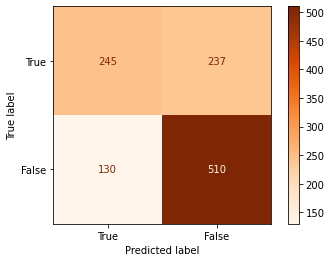

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["True", "False"])

disp.plot(cmap='Oranges');

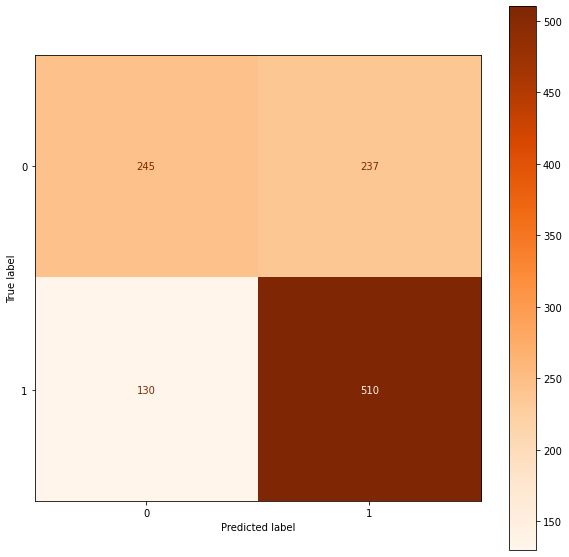

In [ ]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["True", "False"])
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(cmap = 'Oranges', ax=ax)

In [ ]:
#QBR_plot = df2['Home QBR'].plot()
#QBR_plot.set_xlabel('Sample #')
#QBR_plot.set_ylabel('QB Rating')
#QBR_plot.set_title('QB Rating For Every Game')
#plt.show()

#sns.scatterplot(x='Home QBR', y="Away QBR", data=df2);

#sns.distplot(x = df2['Home QBR'], bins = 10)

#sns.stripplot(y = df2['Dif PPG'], x = df2['Home Favored'])
df_1 = df[df['Season'] == 2019]
#sns.scatterplot(x = df_1['Dif PPG'], y = df_1['Dif PTS Allowed'], hue = df_1['Home Win'])
df_1.describe()

In [ ]:
import seaborn as sns
import plotly.express as px

#filter
#df = df[df['roles'] == 'Student']
#df = df[df['mode'] == 'verified']
#df["passed_class"] = np.where(df['grade'] >= 0.55, 1, 0)

#grab columns that you want
df_1 = df[["Home QBR", "Home PPG", "Home TO", "Home Win PCT", "Home Total Yards", "Home Yards Allowed", "Home TOP", "Home Penalties", "Home Win"]]

#get orrelation matrix
corrMatrix = df_1.corr()

#plot correlation matrix
sns.heatmap(corrMatrix, annot=True)
sns.set(font_scale=0.8)
plt.title("Passing Correlation - Verified", fontsize=15)
plt.show()



#easy way to grab wanted columns
#labels = ["Home QBR", "Home PPG", "Home TO", "Home Win PCT"]

#plot scatter matrix
#fig = px.scatter_matrix(df, dimensions=labels, color="Home Win")
#fig.show()


In [ ]:
# Voting Classifier 2018

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier #n_estimators = 80
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier #66.55%: n_estimators = 12, learning_rate = 0.05, max_depth = 1, random_state = 0
from sklearn.ensemble import AdaBoostClassifier #66.55%: n_estimators = 3
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from itertools import product
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth = 4, min_samples_split = 12, random_state = 0)

clf2 = AdaBoostClassifier(n_estimators = 5, learning_rate = 1.85, random_state = 0)

clf3 = GradientBoostingClassifier(n_estimators = 116, learning_rate = .65, max_depth = 1, min_samples_split = 14, random_state = 0)

clf4 = LogisticRegression(C = 0.09, random_state = 0)

clf5 = RandomForestClassifier(n_estimators = 243, max_depth = 17, random_state=0, min_samples_split = 2)

clf6 = SVC(C = 20, kernel = "rbf", probability = True, random_state = 0)

clf7 = KNeighborsClassifier(n_neighbors = 143)

clf8 = GaussianNB()

clf9 = BernoulliNB(alpha = 12, fit_prior = False)

clf10 = MLPClassifier(alpha = 112, max_iter = 70, random_state = 0)

eclf = VotingClassifier(estimators=[('dt', clf1), ('ab', clf2), ('gb', clf3), ('lr', clf4), ('rf', clf5), ('svc', clf6), ('knn', clf7), ('gnb', clf8), ('bnb', clf9), ('MLP',clf10)], voting='hard')

#params = {'svc__C': [.1, 1, 10, 100], 'svc__kernel': ['linear', 'rbf'], 'rf__n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200], 'knn__n_neighbors': [1, 5, 10, 20, 30, 40, 50], 'dt__max_depth': [1, 5, 10, 20, 30, 40,  50], 'dt__min_samples_split': [1, 5, 10, 20, 30, 40, 50], 'ab__n_estimators': [1, 5, 10, 20, 30, 40, 50], 'ab__learning_rate': [0.01, .1, .2, .4, .6, .8, 1], 'gb__n_estimators':[1, 5, 10, 20, 30, 40, 50], 'gb__learning_rate': [0.01, .1, .2, .4, .6, .8, 1], 'gb__max_depth': [1, 5, 10, 20, 30, 40,  50], 'gb__min_samples_split': [1, 5, 10, 20, 30, 40, 50]}

#grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
#gridsearch = grid.fit(X_train, y_train)

#print(gridsearch.best_params_)
#grid_predictions = gridsearch.predict(X_test)

#print(accuracy_score(y_test, grid_predictions))

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, clf9, clf10, eclf], ['Decision Tree', 'Ada Boost', 'Gradient Boosting', 'Logistic Regression', 'Random Forest', 'SVC', 'KNN', 'GaussianNB', 'BernoulliNB', 'MLP', 'Ensemble']):
  clf.fit(X_train, y_train)
  predictions = clf.predict(X_test)
  print("Accuracy:", accuracy_score(y_test, predictions), "(+/- 0.01) [" + label + "]")

Accuracy: 0.6254681647940075 (+/- 0.01) [Decision Tree]
Accuracy: 0.6142322097378277 (+/- 0.01) [Ada Boost]
Accuracy: 0.599250936329588 (+/- 0.01) [Gradient Boosting]
Accuracy: 0.5767790262172284 (+/- 0.01) [Logistic Regression]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.6292134831460674 (+/- 0.01) [Random Forest]
Accuracy: 0.5730337078651685 (+/- 0.01) [SVC]
Accuracy: 0.5730337078651685 (+/- 0.01) [KNN]
Accuracy: 0.6479400749063671 (+/- 0.01) [GaussianNB]
Accuracy: 0.6441947565543071 (+/- 0.01) [BernoulliNB]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy: 0.6179775280898876 (+/- 0.01) [MLP]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy: 0.6329588014981273 (+/- 0.01) [Ensemble]


In [ ]:
# Voting Classifier 2017

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier #n_estimators = 80
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier #66.55%: n_estimators = 12, learning_rate = 0.05, max_depth = 1, random_state = 0
from sklearn.ensemble import AdaBoostClassifier #66.55%: n_estimators = 3
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from itertools import product
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth = 3, min_samples_split = 12, random_state = 0)

clf2 = AdaBoostClassifier(n_estimators = 10, learning_rate = 1.85, random_state = 0)

clf3 = GradientBoostingClassifier(n_estimators = 3, learning_rate = .65, max_depth = 4, min_samples_split = 40, random_state = 0)

clf4 = LogisticRegression(C = .05, random_state = 0)

clf5 = RandomForestClassifier(n_estimators = 120, max_depth = 5, random_state=0, min_samples_split = 2)

clf6 = SVC(C = 19, kernel = "poly", degree = 1, probability = True, random_state = 0)

clf7 = KNeighborsClassifier(n_neighbors = 102)

clf8 = GaussianNB()

clf9 = BernoulliNB(alpha = k, fit_prior = False)

clf10 = MLPClassifier(alpha = 4, max_iter = 41, random_state = 0)

eclf = VotingClassifier(estimators=[('dt', clf1), ('ab', clf2), ('gb', clf3), ('lr', clf4), ('rf', clf5), ('svc', clf6), ('knn', clf7), ('gnb', clf8), ('bnb', clf9), ('MLP',clf10)], voting='hard')

#params = {'svc__C': [.1, 1, 10, 100], 'svc__kernel': ['linear', 'rbf'], 'rf__n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200], 'knn__n_neighbors': [1, 5, 10, 20, 30, 40, 50], 'dt__max_depth': [1, 5, 10, 20, 30, 40,  50], 'dt__min_samples_split': [1, 5, 10, 20, 30, 40, 50], 'ab__n_estimators': [1, 5, 10, 20, 30, 40, 50], 'ab__learning_rate': [0.01, .1, .2, .4, .6, .8, 1], 'gb__n_estimators':[1, 5, 10, 20, 30, 40, 50], 'gb__learning_rate': [0.01, .1, .2, .4, .6, .8, 1], 'gb__max_depth': [1, 5, 10, 20, 30, 40,  50], 'gb__min_samples_split': [1, 5, 10, 20, 30, 40, 50]}

#grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
#gridsearch = grid.fit(X_train, y_train)

#print(gridsearch.best_params_)
#grid_predictions = gridsearch.predict(X_test)

#print(accuracy_score(y_test, grid_predictions))

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, clf9, clf10, eclf], ['Decision Tree', 'Ada Boost', 'Gradient Boosting', 'Logistic Regression', 'Random Forest', 'SVC', 'KNN', 'GaussianNB', 'BernoulliNB', 'MLP', 'Ensemble']):
  clf.fit(X_train, y_train)
  predictions = clf.predict(X_test)
  print("Accuracy:", accuracy_score(y_test, predictions), "(+/- 0.01) [" + label + "]")

Accuracy: 0.6329588014981273 (+/- 0.01) [Decision Tree]
Accuracy: 0.6292134831460674 (+/- 0.01) [Ada Boost]
Accuracy: 0.6179775280898876 (+/- 0.01) [Gradient Boosting]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.602996254681648 (+/- 0.01) [Logistic Regression]
Accuracy: 0.6367041198501873 (+/- 0.01) [Random Forest]
Accuracy: 0.6329588014981273 (+/- 0.01) [SVC]
Accuracy: 0.599250936329588 (+/- 0.01) [KNN]
Accuracy: 0.651685393258427 (+/- 0.01) [GaussianNB]
Accuracy: 0.6292134831460674 (+/- 0.01) [BernoulliNB]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (41) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy: 0.602996254681648 (+/- 0.01) [MLP]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.6329588014981273 (+/- 0.01) [Ensemble]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (41) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
